In [5]:
# ====== Packages =======
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from prettytable import PrettyTable
from tqdm import tqdm


# ---- data manipulators ----
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.utils import resample

# ---- algorithms ----
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# ---- evaluation ------
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, RocCurveDisplay, roc_curve, precision_recall_curve

# ---- user defined modules ----
import pre_proccessing_helpers as hel
import models_helpers as mh


# This line makes matplotlib plot the figures inside the norebook
%matplotlib inline

plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 10

In [9]:
dataset = pd.read_pickle('data_for_tree.pkl')
X_train_raw, y_train_raw, X_test, y_test = mh.data_split(dataset ,n_splits=1, test_size=0.2, train_size=0.8)
X_train, y_train = mh.up_down_sampling(X_train_raw, y_train_raw, ratio=1, up=True)

0    208006
1    208006
Name: corona_result, dtype: int64

In [10]:
dataset

,test_week,cough,fever,sore_throat,shortness_of_breath,head_ache,test_indication,corona_result
0,18,0,0,0,0,0,0,0
1,18,1,0,0,0,0,0,0
2,18,0,1,0,0,0,0,0
3,18,1,0,0,0,0,0,0
4,18,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
278842,11,0,0,0,0,0,0,0
278843,11,0,0,0,0,0,0,0
278844,11,0,0,0,0,0,0,0
278845,11,0,0,0,0,0,1,1


/home/nirlalum/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-aucpr:0.65709
[1]	validation_0-aucpr:0.65812
[2]	validation_0-aucpr:0.66004
[3]	validation_0-aucpr:0.66128
[4]	validation_0-aucpr:0.66400
[5]	validation_0-aucpr:0.66520
[6]	validation_0-aucpr:0.66969
[7]	validation_0-aucpr:0.67239
[8]	validation_0-aucpr:0.67566
[9]	validation_0-aucpr:0.67952
[10]	validation_0-aucpr:0.68280
[11]	validation_0-aucpr:0.68639
[12]	validation_0-aucpr:0.69273
[13]	validation_0-aucpr:0.69333
[14]	validation_0-aucpr:0.69579
[15]	validation_0-aucpr:0.69579
[16]	validation_0-aucpr:0.69633
[17]	validation_0-aucpr:0.69658
[18]	validation_0-aucpr:0.69629
[19]	validation_0-aucpr:0.69626
[20]	validation_0-aucpr:0.69769
[21]	validation_0-aucpr:0.69830
[22]	validation_0-aucpr:0.69815
[23]	validation_0-aucpr:0.69842
[24]	validation_0-aucpr:0.69853
[25]	validation_0-aucpr:0.69878
[26]	validation_0-aucpr:0.69868
[27]	validation_0-aucpr:0.69868
[28]	validation_0-aucpr:0.69875
[29]	validation_0-aucpr:0.69885
[30]	validation_0-aucpr:0.69916
[31]	validation_0-

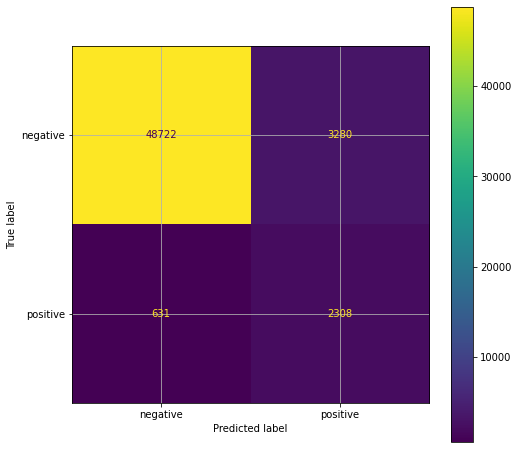

In [11]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic')
clf_xgb.fit(X_train, y_train, verbose=True, early_stopping_rounds=10, eval_metric='aucpr', eval_set=[(X_test, y_test)])
xgb_pred = clf_xgb.predict(X_test)

mh.model_evaluation(y_test, xgb_pred)